# Phase 1 Project Submission

Please fill out:
* Student name: Ning Chen
* Student pace: full time
* Scheduled project review date/time: 11/06/2020
* Instructor name: Fangfang Lee & Justin Tennenbaum
* Blog post URL:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import time
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%%capture
#from tqdm import tqdm_notebook as tqdm
from tqdm.notebook import tqdm
tqdm().pandas()

In [3]:
#api_key='2730ba92b1a45c8f1e12a63dcdfbb7d7'
f = open('tmdb_api.json')
api_key = json.load(f)
url = f'https://api.themoviedb.org/3/discover/movie?api_key={api_key}'
    
ids = []
discover = []
random = np.random.uniform(0, 0.1, 501)

#for i in tqdm.notebook.tqdm(range(1, 101)):
for i in tqdm(range(1, 11)):
    params = {#'vote_count.gte': 1,
             #'sort_by': 'vote_count.desc', 
             'page': i,
             #'primary_release_year': 2020,
             'language': 'en-US',
             'include_adult': 'false',
             'include_video': 'false'}
    response = requests.get(url, params)
    d = response.json()
    discover.extend(d['results'])
    ids.extend([d['results'][j]['id'] for j in range(len(d['results']))])
    time.sleep(random[i])

In [31]:
# df = pd.DataFrame(discover)
# df.to_csv('data_TMDB/discover2020.csv')

In [4]:
d.keys(),d['total_pages'],d['page']

(dict_keys(['page', 'total_results', 'total_pages', 'results']), 500, 10)

In [5]:
film = []
for i in tqdm(ids):
    url = f'https://api.themoviedb.org/3/movie/{i}?api_key={api_key}'
    params = {'language': 'en-US'}
    response = requests.get(url, params)
    film.append(response.json())
    time.sleep(np.random.uniform(0.1, 0.5))

In [84]:
dis = pd.read_csv('data_TMDB/discover.csv',engine='python')
df = pd.read_csv('data_TMDB/en_csv.csv')
df5 = pd.read_csv('data_TMDB/five_year.csv')

In [74]:
dis.columns

Index(['Unnamed: 0', 'popularity', 'vote_count', 'video', 'poster_path', 'id',
       'adult', 'backdrop_path', 'original_language', 'original_title',
       'genre_ids', 'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [7]:
df.columns

Index(['Unnamed: 0', 'adult', 'backdrop_path', 'belongs_to_collection',
       'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'success', 'status_code',
       'status_message'],
      dtype='object')

In [76]:
col_dis=['Unnamed: 0', 'video', 'poster_path','adult', 'backdrop_path', 'overview']

col5=['Unnamed: 0', 'Unnamed: 0.1','adult','backdrop_path','belongs_to_collection','homepage','overview','poster_path','production_companies',
'production_countries','spoken_languages','status','tagline','video','success','status_code','status_message']

col=['Unnamed: 0','adult','backdrop_path','belongs_to_collection','homepage','overview','poster_path','production_companies',
'production_countries','spoken_languages','status','tagline','video','success','status_code','status_message']

In [85]:
df.drop(columns=col,axis=1, inplace=True)
df5.drop(columns=col5,axis=1, inplace=True)
dis.drop(columns=col_dis,axis=1, inplace=True)

In [86]:
dis.dropna(inplace=True)
df.dropna(inplace=True)
df5.dropna(inplace=True)

In [87]:
dis.to_csv('data_TMDB/discover_trim.csv', index=False)
df.to_csv('data_TMDB/en_trim.csv', index=False)
df5.to_csv('data_TMDB/fiveyear_trim.csv', index=False)

In [88]:
dis = pd.read_csv('data_TMDB/discover_trim.csv')
df = pd.read_csv('data_TMDB/en_trim.csv')
df5 = pd.read_csv('data_TMDB/fiveyear_trim.csv')

In [91]:
dis

,popularity,vote_count,id,original_language,original_title,genre_ids,title,vote_average,release_date
0,306.289,7525.0,283366.0,en,Miss Peregrine's Home for Peculiar Children,"[18, 14, 12, 10751]",Miss Peregrine's Home for Peculiar Children,6.7,2016-09-28
1,165.302,303.0,420634.0,en,Terrifier,"[53, 27]",Terrifier,6.3,2016-10-15
2,131.741,3734.0,316727.0,en,The Purge: Election Year,"[28, 27, 53]",The Purge: Election Year,6.4,2016-06-29
3,130.125,6596.0,372058.0,ja,君の名は。,"[10749, 16, 18]",Your Name.,8.6,2016-08-26
4,96.344,5629.0,335797.0,en,Sing,"[16, 35, 18, 10751, 10402]",Sing,7.0,2016-11-23
...,...,...,...,...,...,...,...,...,...
49973,1.400,0.0,722607.0,en,Truth to Power,[99],Truth to Power,0.0,2020-04-15
49974,0.941,0.0,721979.0,en,"No More Darkness, No More Light",[80],"No More Darkness, No More Light",0.0,2020-04-15
49975,0.703,0.0,712496.0,en,Rizo,[18],Rizo,0.0,2020-05-10
49976,0.703,0.0,703093.0,en,Beauty & the Beast,[10751],Beauty & the Beast,0.0,2020-05-10


In [21]:
dfbr = df[(df['budget']!=0) & (df['revenue']!=0)]
df5br = df[(df['budget']!=0) & (df['revenue']!=0)]

In [22]:
df.shape, df5.shape, dfbr.shape, df5br.shape

((9882, 13), (36975, 13), (4483, 13), (4483, 13))

,Unnamed: 0,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,0,306.289,7525.0,False,/tzYkC0vqX8Dokuwynhz1lnWWgWT.jpg,283366.0,False,/ld7V9BjMk2xtiBNcR8savyyk5ca.jpg,en,Miss Peregrine's Home for Peculiar Children,"[18, 14, 12, 10751]",Miss Peregrine's Home for Peculiar Children,6.7,A teenager finds himself transported to an isl...,2016-09-28
1,1,165.302,303.0,False,/4lwh4MX2yCogHflyAYMRbfdnpnm.jpg,420634.0,False,/fBNnj5bQ5YhzPUzxIW1UvLVZepP.jpg,en,Terrifier,"[53, 27]",Terrifier,6.3,A maniacal clown named Art terrorizes three yo...,2016-10-15
2,2,131.741,3734.0,False,/ubLbY97m8lYJ3Fykh7nfiwB5eth.jpg,316727.0,False,/craD86vySKvAkboyeXFnZwHrNA8.jpg,en,The Purge: Election Year,"[28, 27, 53]",The Purge: Election Year,6.4,Two years after choosing not to kill the man w...,2016-06-29
3,3,130.125,6596.0,False,/q719jXXEzOoYaps6babgKnONONX.jpg,372058.0,False,/mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg,ja,君の名は。,"[10749, 16, 18]",Your Name.,8.6,High schoolers Mitsuha and Taki are complete s...,2016-08-26
4,4,96.344,5629.0,False,/lW0kUtXTOVlHTVhDO2VzNBACAHX.jpg,335797.0,False,/z9ft5HYHzWcasR6SGcgeluxTznB.jpg,en,Sing,"[16, 35, 18, 10751, 10402]",Sing,7.0,A koala named Buster recruits his best friend ...,2016-11-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50076,49994,1.4,0.0,False,NaN,722607.0,False,NaN,en,Truth to Power,[99],Truth to Power,0.0,The Grammy-winning lead singer of System of a ...,2020-04-15
50077,49995,0.941,0.0,False,/ti8BFl0DKL6kixK57LN9auJ2rBM.jpg,721979.0,False,NaN,en,"No More Darkness, No More Light",[80],"No More Darkness, No More Light",0.0,A woman fresh out of prison for a crime she to...,2020-04-15
50078,49996,0.703,0.0,False,NaN,712496.0,False,NaN,en,Rizo,[18],Rizo,0.0,"Rizo is the story of an Afro-Latina actress, C...",2020-05-10
50079,49997,0.703,0.0,False,NaN,703093.0,False,NaN,en,Beauty & the Beast,[10751],Beauty & the Beast,0.0,Presented by the Atlanta Ballet in 2018. Long...,2020-05-10


In [63]:
df5br.head()

,budget,genres,id,imdb_id,original_language,original_title,popularity,release_date,revenue,runtime,title,vote_average,vote_count,year
9,17000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",581392.0,tt8850222,ko,반도,800.753,2020-07-15,35878266.0,114.0,Peninsula,7.0,732.0,2020
10,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",337401.0,tt4566758,en,Mulan,752.021,2020-09-04,57000000.0,115.0,Mulan,7.2,2809.0,2020
13,60000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",400160.0,tt4823776,en,The SpongeBob Movie: Sponge on the Run,1114.882,2020-08-14,4700000.0,95.0,The SpongeBob Movie: Sponge on the Run,8.3,1055.0,2020
32,30000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",531499.0,tt8461224,en,The Tax Collector,492.096,2020-08-07,942666.0,95.0,The Tax Collector,6.0,171.0,2020
37,8819200.0,"[{'id': 878, 'name': 'Science Fiction'}]",514207.0,tt8060328,ru,Вторжение,385.953,2020-01-01,32104054.0,129.0,Invasion,7.0,415.0,2020


In [24]:
sns.set()

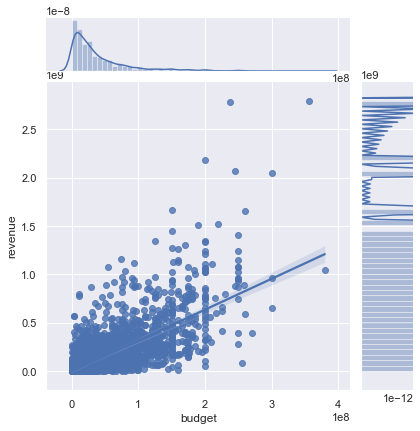

In [25]:
sns.jointplot(x='budget', y='revenue', data=dfbr, kind="reg")

In [67]:
df5br.drop(columns='year', inplace=True)
df5br['year'] = pd.Series(df5br.release_date.str[:4])

<ipython-input-67-b64f260565b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5br['year'] = pd.Series(df5br.release_date.str[:4])


In [46]:
type(df5br.release_date.str[:4]),type(df5br.release_date),type(df5br['year'])

(pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [60]:
x=2000
df5br.loc[x:x+100,'year']

2000    2000
2001    1967
2002    2016
2003    2018
2004    2016
2012    2011
2013    2008
2015    1994
2016    2018
2018    2011
2020    2006
2022    2014
2026    2015
2027    2017
2029    1997
2030    2017
2032    1982
2033    2008
2034    2012
2035    1996
2036    2008
2037    2019
2040    2002
2042    2002
2043    2008
2045    1997
2046    2011
2050    2008
2051    2005
2053    2006
2058    1964
2059    1997
2062    2013
2063    2004
2065    1983
2068    2008
2071    2012
2072    1995
2075    2013
2076    1998
2079    2016
2080    2003
2081    2013
2083    2005
2085    2005
2088    2009
2090    1985
2091    1990
2092    1987
2093    2018
2094    2013
2095    2009
2096    2014
2097    1974
2099    2008
2100    2014
Name: year, dtype: object

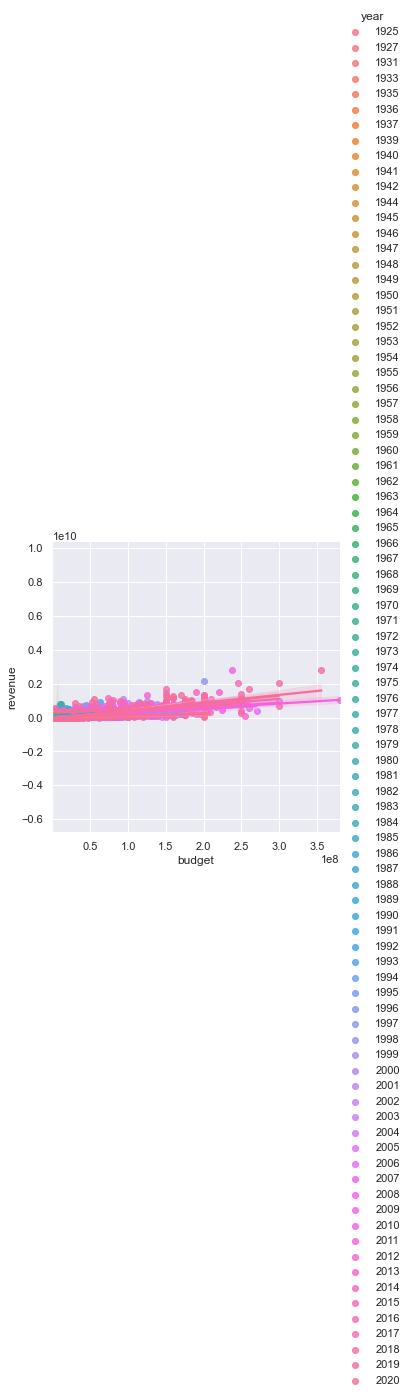

In [35]:
sns.lmplot(x='budget', y='revenue',data=df5br, hue='year')

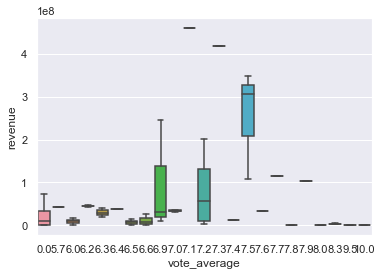

In [87]:
sns.boxplot(x='vote_average',y='revenue',data=df1)

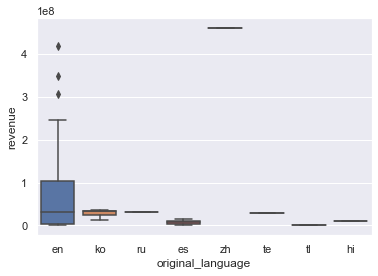

In [88]:
sns.boxplot(x='original_language',y='revenue',data=df1)

In [ ]:
sns.lmplot(x='budget',y='revenue',data=df1, hue='')

In [ ]:
# https://api.themoviedb.org/3/movie/157336?api_key={api_key}
# https://api.themoviedb.org/3/movie/157336/videos?api_key={api_key}
    
# single request:
# https://api.themoviedb.org/3/movie/157336?api_key={api_key}&append_to_response=videos
# multiple requests
# https://api.themoviedb.org/3/movie/157336?api_key={api_key}&append_to_response=videos,images

# popularity.asc
# popularity.desc
# release_date.asc
# release_date.desc
# revenue.asc
# revenue.desc
# primary_release_date.asc
# primary_release_date.desc
# original_title.asc
# original_title.desc
# vote_average.asc
# vote_average.desc
# vote_count.asc
# vote_count.desc